In [6]:
%cd ./bio/binfo1-work/

/home/ggy/bio/binfo1-work


In [2]:
!samtools view -b CLIP-35L33G.bam -F 20 > pCLIP.bam

In [3]:
!samtools view -b CLIP-35L33G.bam -f 16 -F 4 > mCLIP.bam

In [56]:
!samtools view mCLIP.bam | wc -l

16165226


In [ ]:
!samtools mpileup pCLIP.bam --reference mm39.fa > pCLIP.pileup
!samtools mpileup mCLIP.bam --reference mm39.fa > mCLIP.pileup

In [40]:
p = pd.read_pickle('p'+'chr1'+'pkl')

In [41]:
p.sort_values(by='entropy',ascending=False).head(30)

,chrom,pos,_ref,count,basereads,quals,matches,entropy,end
1912547,chr1,143559799,G,34,>>>>>>>>>>>CACCCAAACAAACA.-2GT.-2GT.-2GT.-2GT....,;IIGI<G<IAA3G><<H;GGEGHFH555555555,CACCCAAACAAACA.-2GT.-2GT.-2GT.-2GT.-2GT.-2GT.-...,2.306387,143559800
1410656,chr1,105502436,T,24,>>>>>>>>>>>>.-13CCTGCATGAAAAC.-13CCTGCATGAAAAC...,GHHHE@EIGEIG22EIIGIII/7G,.-13CCTGCATGAAAAC.-13CCTGCATGAAAAC..........,2.189011,105502437
1914210,chr1,143622456,G,22,>>>>>>.-12GATTGCCTTCAT.-12GATTGCCTTCAT.-12GATT...,EEEEII0////0//0//////0,.-12GATTGCCTTCAT.-12GATTGCCTTCAT.-12GATTGCCTTC...,2.133938,143622457
2211505,chr1,160864127,A,86,>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>...,I;IHGGDIBB?6GBEG@GGEHIIGIGII>HEB2GFIDHHDE:IIHE...,.-8TAGAAGAC.-8TAGAAGAC.-8TAGAAGAC.-8TAGAAGAC.-...,2.058814,160864128
967664,chr1,66748350,T,31,>>>>>>>>>>>>>>>>>>>>>>>>.-3TAG.-3TAG.-3TAG.-3T...,8GIGDGHDIHIIIBGEIEEDI?FI8888888,.-3TAG.-3TAG.-3TAG.-3TAG.-3TAG.-3TAG.-3TAG,2.000000,66748351
358120,chr1,34125198,T,143,>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>...,IIDGGEDGHFI8>IID?EDGHBGHEEIDG8IDBH<GDIHGHH<EHD...,.-3TAG.-3TAG.-3TAG.-3TAG,2.000000,34125199
2191845,chr1,159162762,G,22,>>>>>>>>>>>>>>>>>>>>.-3CAT.-3CAT,EBHBHH<II<<IGEIIBDEGHI,.-3CAT.-3CAT,2.000000,159162763
2258386,chr1,164247091,C,20,>>>>>>>>>>>>>.-3TCG.-3TCG.-3TCG.-3TCG.-3TCG.-3...,/G:IGDGGGCHGB<<<<<<<,.-3TCG.-3TCG.-3TCG.-3TCG.-3TCG.-3TCG.-3TCG,2.000000,164247092
1074953,chr1,72883251,C,315,>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>...,;HI@<EIGGDHEHHEIIDBBHBIHHBICEGH;:HI<>HEGIH9IIH...,.-3ACG.-3ACG.-3ACG.-3ACG,2.000000,72883252
859862,chr1,63553747,T,75,>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>...,IHIGHGIGIH6HIGIIIIGIIGDHGHGDDHEGHG>DEG:G?GF@II...,.-3CTG.-3CTG.-3CTG.-3CTG,2.000000,63553748


In [2]:
chrl=[]
for i in range(1,20):
    chrl.append('chr'+str(i))
chrl.append('chrX')
chrl.append('chrY')

In [5]:
for i in chrl:
    !grep -w $i pCLIP.pileup | awk '$4 >= 50' > 'p'$i'.pileup'
    !grep -w $i mCLIP.pileup | awk '$4 >= 50' > 'm'$i'.pileup'

In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
def shannon(seq):
    
    
    dic={}
    for i in seq:
        if i not in 'ATCG.':
            continue
        if not i in dic.keys():
            dic[i]=1
        else:dic[i]+=1
            
    t=sum(dic.values())        
    for j in dic.keys():
        dic[j]/=t
    
    e=0
    for k in dic.keys():
        e=e-dic[k]*np.log2(dic[k])

    return e

In [20]:
set(pileup['_ref'])

{'A', 'C', 'G', 'T', 'a', 'c', 'g', 't'}

In [22]:
toremove = re.compile('[<>$*#^]')
for i in chrl:
    pileup = pd.read_csv('p'+i+'.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
    pileup = pileup[pileup['_ref'].isin(['A','T','C','G'])]
    pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))
    pileup['entropy'] = pileup['matches'].apply(lambda x: shannon(x))
    pileup['end'] = pileup['pos']+1
    pileup.to_pickle('p'+i+'pkl')

In [23]:
def shannon_m(seq):
    
    
    dic={}
    for i in seq:
        if i not in 'atcg,':
            continue
        if not i in dic.keys():
            dic[i]=1
        else:dic[i]+=1
            
    t=sum(dic.values())        
    for j in dic.keys():
        dic[j]/=t
    
    e=0
    for k in dic.keys():
        e=e-dic[k]*np.log2(dic[k])

    return e

In [24]:
toremove = re.compile('[<>$*#^]')
for i in chrl:
    pileup = pd.read_csv('m'+i+'.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
    pileup = pileup[pileup['_ref'].isin(['A','T','C','G'])]
    pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))
    pileup['entropy'] = pileup['matches'].apply(lambda x: shannon_m(x))
    pileup['end'] = pileup['pos']+1
    pileup.to_pickle('m'+i+'pkl')

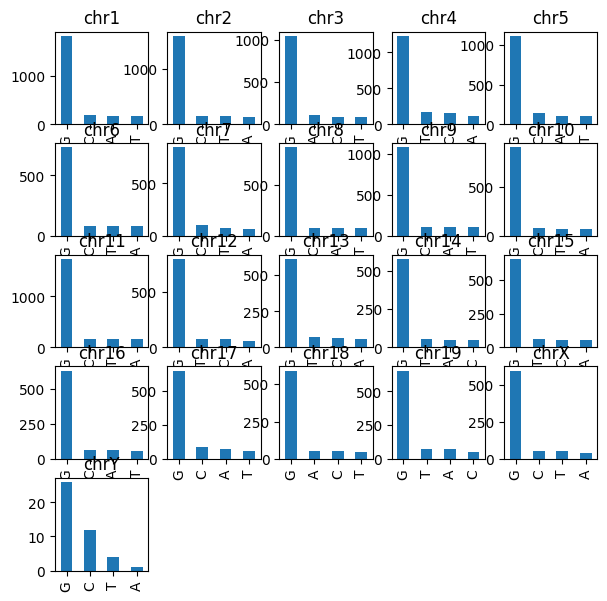

In [35]:
import matplotlib.pyplot as plt

fpos = 1
dd=0
plt.figure(figsize=(7, 7))
for i in chrl:
    d = pd.read_pickle('p'+i+'pkl')
    d = d[(d['entropy']>1)]
    
    plt.subplot(5, 5, fpos)
    d['_ref'].value_counts().plot(kind='bar')
    plt.title(i)
    fpos+=1
    if isinstance(dd, pd.DataFrame):
        dd=pd.concat([dd,d])
    else:dd = d.copy()

Text(0.5, 1.0, 'total (+ strand)')

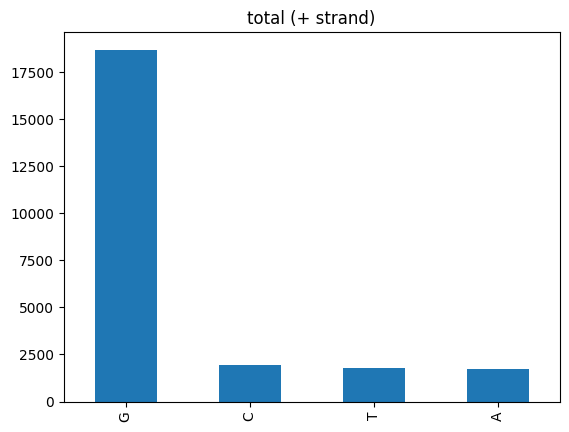

In [36]:
dd['_ref'].value_counts().plot(kind='bar')
plt.title('total (+ strand)')

In [31]:
dd.to_csv('p_pileup.csv', index=False)

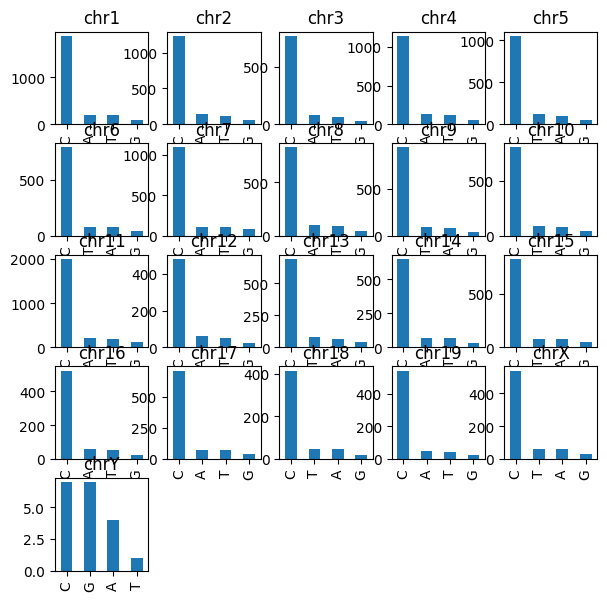

In [38]:
import matplotlib.pyplot as plt

fpos = 1
dd=0
plt.figure(figsize=(7, 7))
for i in chrl:
    d = pd.read_pickle('m'+i+'pkl')
    d = d[(d['entropy']>1)]
    
    plt.subplot(5, 5, fpos)
    d['_ref'].value_counts().plot(kind='bar')
    plt.title(i)
    fpos+=1    
    if isinstance(dd, pd.DataFrame):
        dd=pd.concat([dd,d])
    else:dd = d.copy()

Text(0.5, 1.0, 'total (- strand)')

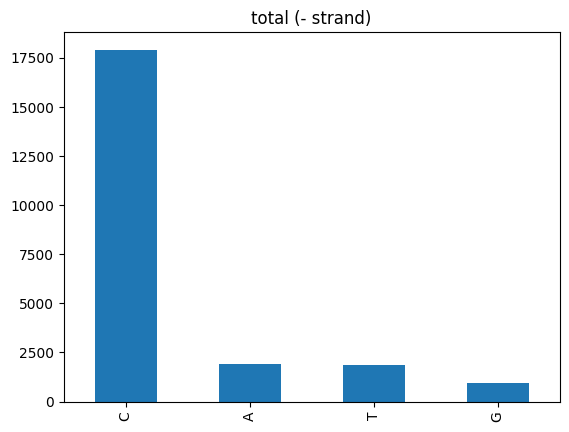

In [39]:
dd['_ref'].value_counts().plot(kind='bar')
plt.title('total (- strand)')

In [34]:
dd.to_csv('m_pileup.csv', index=False)